### **Practical Lab-2 Rohit Kumar 8895806**

##### **Text Classification Models & Outlier Removal**

In [68]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a multinomial Naive Bayes classifier modeel

## **Part-A**

### **Importing and Transforming the Lab-2 Part-A input data**

##### Importing the dataset 

In [69]:
# Importing the dataset for Lab-2 Part-A

data = pd.read_csv("D:/Assignments/AIML/Lab2/Lab2_dataset.csv")

data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [70]:
# Create the feature vector and target vector
X = data["text"]
y = data["label_num"]

In [71]:
# Converting text to numbers using "Count Vectorization" method
from sklearn.feature_extraction.text import CountVectorizer
countVect = CountVectorizer()
X = countVect.fit_transform(X.values)
X.toarray()[:2]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

 train_test_split() is used when solving supervised learning problems. 

In [72]:
# Split the features and targets into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 16)

**train_size** is the number that defines the size of the training set. If we provide a float, then it must be between 0.0 and 1.0 and will define the share of the dataset used for testing. If we provide an int, then it will represent the total number of the training samples. The default value is None.

**test_size** is the number that defines the size of the test set. It’s very similar to train_size. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

**random_state** is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

### **Multinomial Naive Bayes Classifier**

In [73]:

mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [74]:
# Predict the results for X_test
mnb_y_prediction = mnb_model.predict(X_test)

In [75]:
# Find the multinomial Naive Bayes model performance metrics without cross-validation


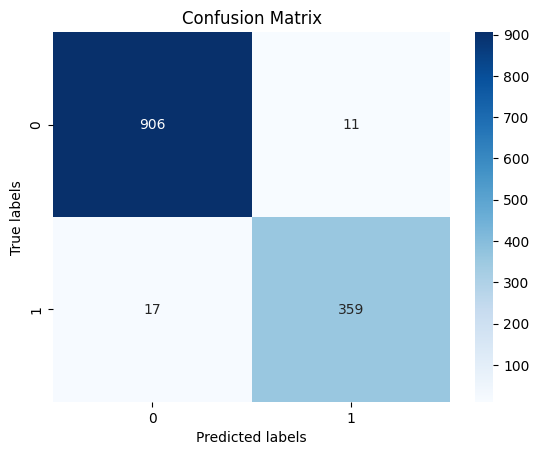

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined y_test (true labels) and mnb_y_prediction (predicted labels)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, mnb_y_prediction)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Set the title
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("The accuracy score of the multinomial Naive Bayes classifier is:", accuracy_score(y_test, mnb_y_prediction))
print("The recall score of the multinomial Naive Bayes classifier is:", recall_score(y_test, mnb_y_prediction))
print("The precision score of the multinomial Naive Bayes classifier is:", precision_score(y_test, mnb_y_prediction))
print("The f1 score of the multinomial Naive Bayes classifier is:", f1_score(y_test, mnb_y_prediction))

The accuracy score of the multinomial Naive Bayes classifier is: 0.9783449342614076
The recall score of the multinomial Naive Bayes classifier is: 0.9547872340425532
The precision score of the multinomial Naive Bayes classifier is: 0.9702702702702702
The f1 score of the multinomial Naive Bayes classifier is: 0.9624664879356568


In [78]:
# Performing Cross validation on Multinomial Naive Bayes Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(mnb_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(mnb_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation
scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.
recall_scores = cross_val_score(mnb_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.97680412 0.97938144 0.9806701  0.97290323 0.97935484]
Mean accuracy: 0.9778227469238443
Cross-validation precision scores: [0.97679226 0.97938144 0.98075992 0.97282633 0.97942895]
Mean precision: 0.9778377782340867
Cross-validation Recall Scores: [0.96616657 0.97496269 0.97283323 0.96637202 0.97530059]
Mean Recall Score: 0.9711270201365483


### **Gaussian Naive Bayes Classifier**

In [79]:
# Create a Gaussian Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train.toarray(),y_train)

GaussianNB()

In [80]:
# Predict the results for X_test

gnb_y_pred = gnb_model.predict(X_test.toarray())


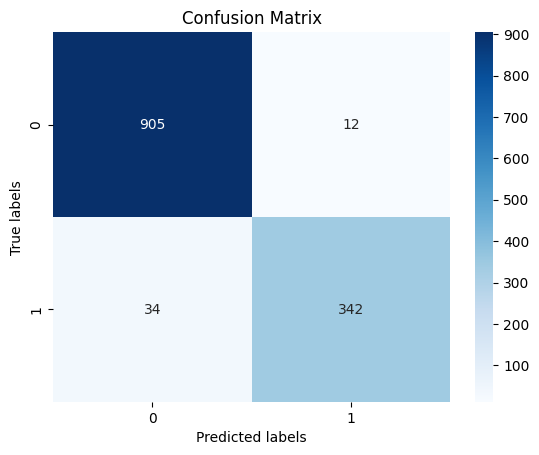

In [81]:
confusion_mat = confusion_matrix(y_test, gnb_y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the axis labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Set the title
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [82]:
# Find the Gaussian Naive Bayes model performance metrics without cross validation.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("The accuracy score of the Gaussian Naive Bayes classifier is:", accuracy_score(y_test, gnb_y_pred))

print("The recall score of the Gaussian Naive Bayes classifier is:", recall_score(y_test, gnb_y_pred))

print("The precision score of the Gaussian Naive Bayes classifier is:", precision_score(y_test, gnb_y_pred))

print("The f1 score of the Gaussian Naive Bayes classifier is:", f1_score(y_test, gnb_y_pred))

The accuracy score of the Gaussian Naive Bayes classifier is: 0.9644238205723125
The recall score of the Gaussian Naive Bayes classifier is: 0.9095744680851063
The precision score of the Gaussian Naive Bayes classifier is: 0.9661016949152542
The f1 score of the Gaussian Naive Bayes classifier is: 0.9369863013698628


In [83]:
# Performing Cross-validation of Gaussian Naive Bayes Classification model


from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(gnb_model, X_train.toarray(), y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(gnb_model, X_train.toarray(), y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(gnb_model, X_train.toarray(), y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.95489691 0.95360825 0.96391753 0.95354839 0.96258065]
Mean accuracy: 0.9577103425340872
Cross-validation precision scores: [0.95477565 0.95362316 0.96413406 0.95404495 0.96239251]
Mean precision: 0.9577940669203135
Cross-validation Recall Scores: [0.93890704 0.92385158 0.95637024 0.93421458 0.94265297]
Mean Recall Score: 0.9391992805289083


### **Conclusion:**

#### **After checking values of accuracy the multinomial Naive Bayes classifier performs better than the Gaussian Naive Bayes classifier.**

#####  **The accuracy of multinomial NB classifier is 97.83% whereas the Gaussian NB classifier accuracy is 96.44%.**
#####  **The precision score of multinomial NB classifier is 97.02% whereas the Gaussian NB classifier precision is 96.61%.**
#####  **The recall score of multinomial NB classifier is 95.47% whereas the Gaussian NB classifier recall is 90.95%.**
#####  **The f1-score of multinomial NB classifier is 96.24% whereas the Gaussian NB classifier f1-score is 93.69%.**

#### **Hence, I can see that multinomial NB classifier performs better than the Gaussian NB classifier.**


## **Part-B**

### **Importing the dataset for Lab-2 Part-B**

In [84]:
# Importing the dataset for Lab-2 Part-A
dataframe = pd.read_csv("D:/Assignments/AIML/Lab2/AB_NYC_2019.csv")

dataframe.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [85]:
# Determine the size of the data
dataframe.shape # Gives number of rows and columns in the dataframe


(48895, 16)

In [86]:
# Create a column for Price per Night
dataframe["pricepernight"] = dataframe["price"]/dataframe["minimum_nights"]
dataframe.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0


In [87]:
# Checking for Missing values in price per night column
dataframe.pricepernight.isnull().sum()

0

Our target is to remove outliers in the price per night column. As this column doesn't have any missing values, we are moving forward for outlier detection.

In [88]:
dataframe.pricepernight.describe()

count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: pricepernight, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x182e5eba110>,
 'caps': [<matplotlib.lines.Line2D at 0x18581e77050>,
 'boxes': [<matplotlib.lines.Line2D at 0x18581eba590>],
 'medians': [<matplotlib.lines.Line2D at 0x18362fcb4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18581f13150>],
 'means': []}

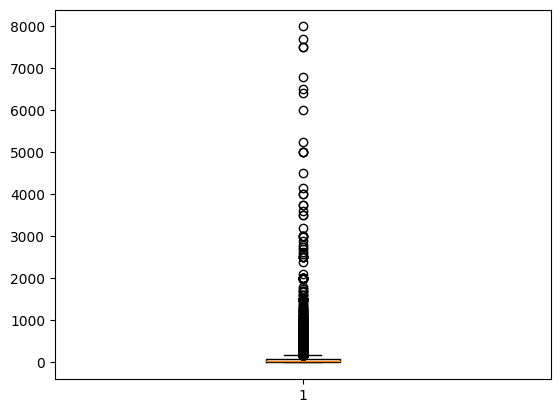

In [89]:
# Drawing a box plot to identify the outliers visually

plt.boxplot(dataframe.pricepernight)

#### **As the price per night column contains outliers it will impact:**
#### **The mean values will be inflated to large value because of higher value outliers**
#### **The median value will be shifted due to presence of outliers.**
#### **The upper quantile values will be larger due to extreme outliers**

In [90]:
# The mean, median, upper quantile of the price per night column with outliers

print("The mean of price per night data with outliers is:", dataframe["pricepernight"].mean())
print("The median of price per night data with outliers is:", dataframe["pricepernight"].median())
print("The upper quantile of price per night data with outliers is:", dataframe["pricepernight"].quantile(1))

The mean of price per night data with outliers is: 70.17424725447543
The median of price per night data with outliers is: 44.5
The upper quantile of price per night data with outliers is: 8000.0


## **Outlier Removal Using Percentiles**

### **This process identifies the data points that are below 1 percentile or the data points above 99 percentile as outliers**

In [91]:
# Exploring the 0th quantile

dataframe.pricepernight.quantile(0)

0.0

In [92]:
# Exploring the 100th quantile

dataframe.pricepernight.quantile(1)

8000.0

In [93]:
# Exploring the 1 quantile of price per night data

z_1= dataframe.pricepernight.quantile(0.01,interpolation = "higher")

z_1

1.2333333333333334

In [94]:
# Exploring the 99th quantile of price per night data

z_99= dataframe.pricepernight.quantile(0.99,interpolation = "lower")

z_99

443.0

In [95]:
# Filtering the outliers that are below 1 percentile or above 99 percentile

dataframe[(dataframe.pricepernight < z_1) | (dataframe.pricepernight > z_99)].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365,0.583333
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,800.000000
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140,0.550000
349,94209,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,503800,Sadatu,Brooklyn,Crown Heights,40.67473,-73.94494,Entire home/apt,100,90,0,NaN,NaN,1,365,1.111111
418,141335,Architect's Brownstone,687361,Orna,Brooklyn,Park Slope,40.67535,-73.97654,Entire home/apt,495,1,35,2018-01-13,0.41,1,355,495.000000


In [96]:
# Finding the count of outliers

dataframe[(dataframe.pricepernight < z_1) | (dataframe.pricepernight > z_99)]["pricepernight"].count()

972

#### **There are 972 outlier datapoints identified using quntile method of outlier removal**
#### **These outliers are 972/48895 = 0.0198 i.e., almost 2% of the total data observations.**
#### **Hence, these outliers can be removed as their share is very low in data.**

In [97]:
# The cleaned dataset after the outlier removal

dataframe[(dataframe.pricepernight >= z_1) & (dataframe.pricepernight <= z_99)].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0


In [98]:
# The mean, median, upper quantile of the price per night column after removing outlier using percentile method

print("The mean of price per night data without outliers (quantile method) is:", dataframe[(dataframe.pricepernight >= z_1) & (dataframe.pricepernight <= z_99)]["pricepernight"].mean())
print("The median of price per night data without outliers (quantile method) is:", dataframe[(dataframe.pricepernight >= z_1) & (dataframe.pricepernight <= z_99)]["pricepernight"].median())
print("The upper quantile of price per night data without outliers (quantile method) is:", dataframe[(dataframe.pricepernight >= z_1) & (dataframe.pricepernight <= z_99)]["pricepernight"].quantile(1))

The mean of price per night data without outliers (quantile method) is: 61.089823898138405
The median of price per night data without outliers (quantile method) is: 44.5
The upper quantile of price per night data without outliers (quantile method) is: 443.0


## **Outlier Removal using the IQR Method**

### **In this method, the data points below 1.5 times the IQR range to the first quartile (Q1) (or) the data points above 1.5 times the IQR range to the third quartile (Q3) will be considered as outliers.**

In [99]:
# Exploring the Q1, Q2, Q3 of the price per night column

dataframe.pricepernight.describe()

count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: pricepernight, dtype: float64

In [100]:
# The 25th quantile or Q1

Q1 = dataframe.pricepernight.quantile(0.25)

Q1

20.0

In [101]:
# The 75th quantile or Q3

Q3 = dataframe.pricepernight.quantile(0.75)

Q3

81.5

In [102]:
# The IQR of price per night column

IQR = Q3 - Q1

IQR

61.5

In [103]:
# Exploring the lower whisker point

lw = Q1 - (1.5 * IQR) # lw values is claculated as -72.25. Hence, the minimum value of data will be the lower whisker.

lw = lw if(lw >= min(dataframe.pricepernight)) else min(dataframe.pricepernight)

lw

0.0

In [104]:
# Exploring the upper whisker point

uw = Q3 + (1.5 * IQR)

uw

173.75

#### **Hence, In this method, any data points above 173.75 will be considered as outliers.**

In [105]:
# Filtering the outliers

dataframe[(dataframe.pricepernight < lw) | (dataframe.pricepernight > uw)].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
68,16595,*HAVEN LOFT - Entire Floor - Six Windows - Bri...,64522,Daniel,Brooklyn,Williamsburg,40.70933,-73.96792,Entire home/apt,275,1,148,2019-06-23,1.40,1,362,275.0
76,18152,Manhattan Room,69942,Victoria,Manhattan,Upper East Side,40.76865,-73.95058,Private room,200,1,142,2019-07-06,1.50,1,322,200.0
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,800.0
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298,175.0


In [106]:
# Finding the count of outliers

dataframe[(dataframe.pricepernight < lw) | (dataframe.pricepernight > uw)]["pricepernight"].count()

3333

#### **There are 3333 outlier datapoints identified using IQR method of outlier removal**
#### **These outliers are 3333/48895 = 0.0682 i.e., almost 6.8% of the total data observations.**
#### **Hence, these outliers can be removed as their share is very low in data.**

In [107]:
# The cleaned dataset after the outlier removal

dataframe[(dataframe.pricepernight >= lw) & (dataframe.pricepernight <= uw)].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.000000
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,66.666667


In [108]:
# The mean, median, upper quantile of the price per night column after removing outlier using IQR method

print("The mean of price per night data without outliers (IQR method) is:", dataframe[(dataframe.pricepernight >= lw) & (dataframe.pricepernight <= uw)]["pricepernight"].mean())
print("The median of price per night data without outliers (IQR method) is:", dataframe[(dataframe.pricepernight >= lw) & (dataframe.pricepernight <= uw)]["pricepernight"].median())
print("The upper quantile of price per night data without outliers (IQR method) is:", dataframe[(dataframe.pricepernight >= lw) & (dataframe.pricepernight <= uw)]["pricepernight"].quantile(1))

The mean of price per night data without outliers (IQR method) is: 49.181726584663394
The median of price per night data without outliers (IQR method) is: 40.0
The upper quantile of price per night data without outliers (IQR method) is: 173.33333333333334


## **Outlier Removal using Z-Score method**

### **In this method, all the datapoints will be standardized as per the Z-score standardization. This will arrange the data points in a normal (Gaussian) distribution curve (inverted bell curve). The mean of the standardized points would be 0 and standard deviation would become 1. Any data points beyond 3 standard devaitions (on either side) away from the mean would be considered as outliers. That means any data points with standardized values less than -3 or greater than +3 would be considered as outliers.**

### **Z_score = (x - mean(x))/std(x)**

In [109]:
# Standardizing the price per night column using Z_score standardization

# Creating the column of standardized price per night data values.

dataframe["ppn_Z_score"] = (dataframe["pricepernight"] - (dataframe["pricepernight"].mean()))/(dataframe["pricepernight"].std())

In [110]:
# Filtering the outliers using Z-Scores

dataframe[(dataframe["ppn_Z_score"] < -3) | (dataframe["ppn_Z_score"] > 3)].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight,ppn_Z_score
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,800.0,4.630275
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0,1300.0,7.802454
1553,702551,UWS renovated 2bedroom 2bath near everything.,3606458,Mathew,Manhattan,Upper West Side,40.79507,-73.97568,Entire home/apt,900,1,7,2019-01-01,0.09,2,365,900.0,5.264711
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83,1000.0,5.899146
1910,843524,A Little Palace in Brooklyn for Shoots and Events,673406,Alex & Britta,Brooklyn,Bushwick,40.70234,-73.92424,Entire home/apt,800,1,34,2019-07-01,0.45,1,365,800.0,4.630275


In [111]:
# Counting the filtered outliers using Z-Scores

dataframe[(dataframe["ppn_Z_score"] < -3) | (dataframe["ppn_Z_score"] > 3)]["ppn_Z_score"].count()

306

#### **There are 306 outlier datapoints identified using Z_score standardization method of outlier removal**
#### **These outliers are (306/48895)*100 = 0.6258**
#### **Hence, these outliers can be removed as their share is very low in data.**

In [112]:
# The cleaned dataset after the outlier removal

dataframe[(dataframe.ppn_Z_score >= -3) & (dataframe.ppn_Z_score <= 3)].head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,pricepernight,ppn_Z_score
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0,0.500099
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0,0.982270
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.0,-0.127993
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,0.119437
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0,-0.394456


In [113]:
# The mean, median, upper quantile of the price per night column after removing outlier using Z-score method

print("The mean of price per night data without outliers (Z-score method) is:", dataframe[(dataframe.ppn_Z_score >= -3) & (dataframe.ppn_Z_score <= 3)]["pricepernight"].mean())
print("The median of price per night data without outliers (Z-score method) is:", dataframe[(dataframe.ppn_Z_score >= -3) & (dataframe.ppn_Z_score <= 3)]["pricepernight"].median())
print("The upper quantile of price per night data without outliers (Z-score method) is:", dataframe[(dataframe.ppn_Z_score >= -3) & (dataframe.ppn_Z_score <= 3)]["pricepernight"].quantile(1))

The mean of price per night data without outliers (Z-score method) is: 62.05554109313307
The median of price per night data without outliers (Z-score method) is: 43.75
The upper quantile of price per night data without outliers (Z-score method) is: 539.0


### Hence, I can see that the actual mean, median, and upper quantile values without outliers represent the actual central tendency of data.
